In [18]:
# Import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import re
from varname import nameof

import requests
from bs4 import BeautifulSoup
import html
import lxml

In [19]:
import sys, os

dir = os.path.dirname
sys.path.append(dir(os.getcwd()))

import src.utils.mining_data_tb as md
import src.utils.visualization_tb as vis
import src.utils.folder_tb as fo

In [20]:
path = fo.path_to_folder(2,"data")

main = pd.read_excel(path + "2017-2018 FNDDS At A Glance - FNDDS Nutrient Values.xlsx", skiprows = 1)
main.head()

,Food code,Main food description,WWEIA Category number,WWEIA Category description,Energy (kcal),Protein (g),Carbohydrate (g),"Sugars, total\n(g)","Fiber, total dietary (g)",Total Fat (g),...,20:1\n(g),22:1\n(g),18:2\n(g),18:3\n(g),18:4\n(g),20:4\n(g),20:5 n-3\n(g),22:5 n-3\n(g),22:6 n-3\n(g),Water\n(g)
0,11000000,"Milk, human",9602,Human milk,70,1.03,6.89,6.89,0.0,4.38,...,0.040,0.0,0.374,0.052,0.0,0.026,0.000,0.000,0.0,87.50
1,11100000,"Milk, NFS",1004,"Milk, reduced fat",51,3.34,4.87,4.89,0.0,1.99,...,0.002,0.0,0.069,0.007,0.0,0.003,0.000,0.001,0.0,89.04
2,11111000,"Milk, whole",1002,"Milk, whole",60,3.28,4.67,4.81,0.0,3.20,...,0.004,0.0,0.115,0.012,0.0,0.004,0.001,0.002,0.0,88.10
3,11111100,"Milk, low sodium, whole",1002,"Milk, whole",61,3.10,4.46,4.46,0.0,3.46,...,0.000,0.0,0.078,0.050,0.0,0.000,0.000,0.000,0.0,88.20
4,11111150,"Milk, calcium fortified, whole",1002,"Milk, whole",60,3.28,4.67,4.81,0.0,3.20,...,0.004,0.0,0.115,0.012,0.0,0.004,0.001,0.002,0.0,88.10


In [49]:
main2.shape

(7083, 29)

In [22]:
#main.info()

In [23]:
# Key nutrients for the comparison with recommended daily intake
daily_intake_nutrients = ["Protein (g)", "Water\n(g)", "Fiber, total dietary (g)", "Vitamin A, RAE (mcg_RAE)", "Thiamin (mg)", "Riboflavin (mg)", "Niacin (mg)", "Vitamin B-6 (mg)", "Vitamin B-12 (mcg)",  "Vitamin B-12, added\n(mcg)", "Folate, total (mcg)", "Vitamin C (mg)", "Calcium (mg)", "Iron\n(mg)", "Magnesium (mg)", "Potassium (mg)", "Sodium (mg)", "Zinc\n(mg)"]

# Additional interesting nutrients to explore
additional_nutrients = ["Energy (kcal)", "Sugars, total\n(g)", "Total Fat (g)", "Fatty acids, total saturated (g)", "Fatty acids, total monounsaturated (g)", "Fatty acids, total polyunsaturated (g)", "Cholesterol (mg)", "Vitamin D (D2 + D3) (mcg)"]

# For grouping and categorization
support_columns = ["Main food description", "WWEIA Category number", "WWEIA Category description"]

In [24]:
# Filtering the dataframe by the columns I need
main2 = main[support_columns + daily_intake_nutrients + additional_nutrients]
main2.head()

,Main food description,WWEIA Category number,WWEIA Category description,Protein (g),Water\n(g),"Fiber, total dietary (g)","Vitamin A, RAE (mcg_RAE)",Thiamin (mg),Riboflavin (mg),Niacin (mg),...,Sodium (mg),Zinc\n(mg),Energy (kcal),"Sugars, total\n(g)",Total Fat (g),"Fatty acids, total saturated (g)","Fatty acids, total monounsaturated (g)","Fatty acids, total polyunsaturated (g)",Cholesterol (mg),Vitamin D (D2 + D3) (mcg)
0,"Milk, human",9602,Human milk,1.03,87.50,0.0,61,0.014,0.036,0.177,...,17,0.17,70,6.89,4.38,2.009,1.658,0.497,14,0.1
1,"Milk, NFS",1004,"Milk, reduced fat",3.34,89.04,0.0,59,0.057,0.137,0.110,...,39,0.42,51,4.89,1.99,1.164,0.426,0.065,8,1.1
2,"Milk, whole",1002,"Milk, whole",3.28,88.10,0.0,32,0.056,0.138,0.105,...,38,0.41,60,4.81,3.20,1.860,0.688,0.108,12,1.1
3,"Milk, low sodium, whole",1002,"Milk, whole",3.10,88.20,0.0,29,0.020,0.105,0.043,...,3,0.38,61,4.46,3.46,2.154,0.999,0.128,14,1.3
4,"Milk, calcium fortified, whole",1002,"Milk, whole",3.28,88.10,0.0,32,0.056,0.138,0.105,...,38,0.41,60,4.81,3.20,1.860,0.688,0.108,12,1.1


In [25]:
# RENAMING THE COLUMNS

# Key nutrients for the comparison with recommended daily intake
new_daily_intake_nutrients = ["Protein (g)", "Water (g)", "Fiber, total dietary (g)", "Vitamin A, RAE (mcg_RAE)", "Thiamin (mg)", "Riboflavin (mg)", "Niacin (mg)", "Vitamin B-6 (mg)", "Vitamin B-12 (mcg)",  "Vitamin B-12, added (mcg)", "Folate, total (mcg)", "Vitamin C (mg)", "Calcium (mg)", "Iron (mg)", "Magnesium (mg)", "Potassium (mg)", "Sodium (mg)", "Zinc (mg)"]

# Additional interesting nutrients to explore
new_additional_nutrients = ["Energy (kcal)", "Sugars, total (g)", "Total Fat (g)", "Fatty acids, total saturated (g)", "Fatty acids, total monounsaturated (g)", "Fatty acids, total polyunsaturated (g)", "Cholesterol (mg)", "Vitamin D (D2 + D3) (mcg)"]

# For grouping and categorization
new_support_columns = ["Food name", "Category number", "Category name"]

In [26]:
main2.columns = new_support_columns + new_daily_intake_nutrients + new_additional_nutrients
main2.head()

,Food name,Category number,Category name,Protein (g),Water (g),"Fiber, total dietary (g)","Vitamin A, RAE (mcg_RAE)",Thiamin (mg),Riboflavin (mg),Niacin (mg),...,Sodium (mg),Zinc (mg),Energy (kcal),"Sugars, total (g)",Total Fat (g),"Fatty acids, total saturated (g)","Fatty acids, total monounsaturated (g)","Fatty acids, total polyunsaturated (g)",Cholesterol (mg),Vitamin D (D2 + D3) (mcg)
0,"Milk, human",9602,Human milk,1.03,87.50,0.0,61,0.014,0.036,0.177,...,17,0.17,70,6.89,4.38,2.009,1.658,0.497,14,0.1
1,"Milk, NFS",1004,"Milk, reduced fat",3.34,89.04,0.0,59,0.057,0.137,0.110,...,39,0.42,51,4.89,1.99,1.164,0.426,0.065,8,1.1
2,"Milk, whole",1002,"Milk, whole",3.28,88.10,0.0,32,0.056,0.138,0.105,...,38,0.41,60,4.81,3.20,1.860,0.688,0.108,12,1.1
3,"Milk, low sodium, whole",1002,"Milk, whole",3.10,88.20,0.0,29,0.020,0.105,0.043,...,3,0.38,61,4.46,3.46,2.154,0.999,0.128,14,1.3
4,"Milk, calcium fortified, whole",1002,"Milk, whole",3.28,88.10,0.0,32,0.056,0.138,0.105,...,38,0.41,60,4.81,3.20,1.860,0.688,0.108,12,1.1


In [27]:
#main2.sort_values(by = "Protein (g)", ascending = False).head(40)

In [28]:
# main2["Food name"].str.contains("heura").sum()
#main2["Category name"].str.contains("Processed soy products").sum()
main2["Food name"].str.contains("meatless").sum()

62

In [29]:
#soy_products = main2["Category name"].str.contains("Processed soy products")
#main2[soy_products]

In [30]:
check = main2["Category name"].str.contains('Poultry mixed dishes')
main2[check]

,Food name,Category number,Category name,Protein (g),Water (g),"Fiber, total dietary (g)","Vitamin A, RAE (mcg_RAE)",Thiamin (mg),Riboflavin (mg),Niacin (mg),...,Sodium (mg),Zinc (mg),Energy (kcal),"Sugars, total (g)",Total Fat (g),"Fatty acids, total saturated (g)","Fatty acids, total monounsaturated (g)","Fatty acids, total polyunsaturated (g)",Cholesterol (mg),Vitamin D (D2 + D3) (mcg)
1119,"Turkey with barbecue sauce, skin eaten",3004,Poultry mixed dishes,18.23,59.88,0.3,17,0.035,0.192,6.751,...,467,1.49,195,9.97,8.16,2.286,2.920,2.333,67,0.4
1120,"Turkey with barbecue sauce, skin not eaten",3004,Poultry mixed dishes,18.86,64.54,0.3,6,0.039,0.201,6.927,...,464,1.67,150,9.97,2.82,0.793,0.893,0.740,59,0.2
1722,Chicken or turkey cacciatore,3004,Poultry mixed dishes,13.19,66.68,1.1,18,0.231,0.173,4.319,...,664,0.84,174,1.60,10.63,2.578,4.734,2.414,58,0.1
1725,"Stewed chicken with tomato-based sauce, Mexica...",3004,Poultry mixed dishes,11.98,77.31,0.5,8,0.045,0.097,3.523,...,397,0.76,120,0.97,7.06,1.513,2.651,2.159,49,0.0
1726,Chili con carne with chicken or turkey and beans,3004,Poultry mixed dishes,8.42,80.00,2.4,21,0.233,0.103,2.571,...,372,1.00,84,2.27,2.67,0.677,0.867,0.801,21,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2576,"Turkey with gravy, dressing, potatoes, vegetab...",3004,Poultry mixed dishes,6.97,71.16,1.3,44,0.138,0.252,3.057,...,326,0.48,128,4.82,3.89,0.877,1.235,1.087,14,0.1
4619,Chicken cornbread,3004,Poultry mixed dishes,13.81,67.33,0.4,69,0.079,0.183,3.585,...,460,0.95,167,0.27,8.14,1.899,3.575,1.922,108,0.5
4683,"Adobo, with noodles",3004,Poultry mixed dishes,16.89,65.25,0.4,4,0.192,0.204,3.059,...,510,2.39,172,0.03,7.66,2.479,3.469,0.973,72,0.3
4833,"Adobo, with rice",3004,Poultry mixed dishes,17.68,63.32,0.2,4,0.242,0.213,3.589,...,522,2.54,181,0.03,7.94,2.580,3.607,1.022,75,0.4


In [31]:
#main2["Category name"].unique()

In [32]:
# -------------------------------- FILTERS --------------------------------
# NEGATIVE FILTERS

others = ['Formula, ready-to-feed', 'Formula, prepared from powder', 'Formula, prepared from concentrate', 'Sugar substitutes', 'Not included in a food category']

baby_food = ['Baby food: yogurt', 'Baby food: snacks and sweets', 'Baby food: meat and dinners', ]

desserts_and_snacks = ['Ice cream and frozen dairy desserts', 'Milk shakes and other dairy drinks', 'Cakes and pies', 'Candy not containing chocolate', 'Doughnuts, sweet rolls, pastries', 'Crackers, excludes saltines', 'Cookies and brownies', 'Biscuits, muffins, quick breads', 'Pancakes, waffles, French toast', 'Cereal bars', 'Nutrition bars', 'Saltine crackers', 'Pretzels/snack mix', 'Potato chips', 'Candy containing chocolate', 'Pancakes, waffles, French toast']

drinks = ['Soft drinks', 'Diet soft drinks', 'Flavored or carbonated water', 'Other diet drinks', 'Beer', 'Liquor and cocktails', 'Wine', 'Nutritional beverages', 'Protein and nutritional powders', 'Sport and energy drinks', 'Diet sport and energy drinks']

sandwiches = ['Burritos and tacos', 'Other sandwiches (single code)', 'Burgers (single code)', 'Egg/breakfast sandwiches (single code)', 'Frankfurter sandwiches (single code)', 'Frankfurter sandwiches (single code)', 'Vegetables on a sandwich']

prepared_dishes = ['Rolls and buns', 'Egg rolls, dumplings, sushi', 'Pasta mixed dishes, excludes macaroni and cheese', 'Macaroni and cheese', 'Pizza', 'Meat mixed dishes', 'Stir-fry and soy-based sauce mixtures', 'Bean, pea, legume dishes', 'Seafood mixed dishes', 'Rice mixed dishes', 'Fried rice and lo/chow mein', 'Poultry mixed dishes']

sauces = ['Dips, gravies, other sauces''Pasta sauces, tomato-based', 'Mustard and other condiments', 'Mayonnaise', 'Jams, syrups, toppings']

###
full_negative_filter = others + baby_food + desserts_and_snacks + drinks + sandwiches + prepared_dishes + sauces

# POSITIVE FILTERS

milks = ['Lamb, goat, game', 'Human milk', 'Milk, reduced fat', 'Milk, whole', 'Milk, lowfat', 'Milk, nonfat', 'Flavored milk, whole', 'Yogurt, regular', 'Yogurt, Greek']

cheese = ['Cheese', 'Cottage/ricotta cheese']

other_animal_products = ['Eggs and omelets', 'Butter and animal fats']

meats = ['Ground beef', 'Cold cuts and cured meats', 'Bacon', 'Pork', 'Liver and organ meats', 'Frankfurters', 'Sausages']

chicken = ['Turkey, duck, other poultry', 'Chicken, whole pieces', 'Chicken patties, nuggets and tenders']

fish = ['Fish', 'Shellfish']


milk_substitutes = ['Milk substitutes']

beans = ['Beans, peas, legumes']

soy_products = ['Processed soy products']

nuts = ['Nuts and seeds']

other_veggie_products = ['Peanut butter and jelly sandwiches (single code)', 'Oatmeal']

###
animal_filter = milks + cheese + other_animal_products + meats + chicken + fish
veggie_filter = milk_substitutes + beans + soy_products + nuts + other_veggie_products

full_positive_filter = animal_filter + veggie_filter

In [40]:
# -------------------------------- CONDITIONS --------------------------------
# NEGATIVE CONDITIONS

others_cond = main2[~main2["Category name"].isin(others)].index

baby_food_cond = main2[~main2["Category name"].isin(baby_food)].index

desserts_and_snacks_cond = main2[~main2["Category name"].isin(desserts_and_snacks)].index

drinks_cond = main2[~main2["Category name"].isin(drinks)].index

sandwiches_cond = main2[~main2["Category name"].isin(sandwiches)].index

prepared_dishes_cond = main2[~main2["Category name"].isin(prepared_dishes)].index

sauces_cond = main2[~main2["Category name"].isin(sauces)].index

###
full_negative_cond = main2[~main2["Category name"].isin(full_negative_filter)].index


# POSITIVE CONDITIONS

milks_cond = main2[main2["Category name"].isin(milks)].index

cheese_cond = main2[main2["Category name"].isin(cheese)].index

other_animal_products_cond = main2[main2["Category name"].isin(other_animal_products)].index

meats_cond = main2[main2["Category name"].isin(meats)].index

chicken_cond = main2[main2["Category name"].isin(chicken)].index

fish_cond = main2[main2["Category name"].isin(fish)].index


milk_substitutes_cond = main2[main2["Category name"].isin(milk_substitutes)].index

beans_cond = main2[main2["Category name"].isin(beans)].index

soy_products_cond = main2[main2["Category name"].isin(soy_products)].index

nuts_cond = main2[main2["Category name"].isin(nuts)].index

other_veggie_products_cond = main2[main2["Category name"].isin(other_veggie_products)].index

###
animal_cond = main2[main2["Category name"].isin(animal_filter)].index

veggie_cond = main2[main2["Category name"].isin(veggie_filter)].index

full_positive_cond = main2[main2["Category name"].isin(full_positive_filter)].index

In [48]:
main2.loc[others_cond]

,Food name,Category number,Category name,Protein (g),Water (g),"Fiber, total dietary (g)","Vitamin A, RAE (mcg_RAE)",Thiamin (mg),Riboflavin (mg),Niacin (mg),...,Sodium (mg),Zinc (mg),Energy (kcal),"Sugars, total (g)",Total Fat (g),"Fatty acids, total saturated (g)","Fatty acids, total monounsaturated (g)","Fatty acids, total polyunsaturated (g)",Cholesterol (mg),Vitamin D (D2 + D3) (mcg)
0,"Milk, human",9602,Human milk,1.03,87.50,0.0,61,0.014,0.036,0.177,...,17,0.17,70,6.89,4.38,2.009,1.658,0.497,14,0.1
1,"Milk, NFS",1004,"Milk, reduced fat",3.34,89.04,0.0,59,0.057,0.137,0.110,...,39,0.42,51,4.89,1.99,1.164,0.426,0.065,8,1.1
2,"Milk, whole",1002,"Milk, whole",3.28,88.10,0.0,32,0.056,0.138,0.105,...,38,0.41,60,4.81,3.20,1.860,0.688,0.108,12,1.1
3,"Milk, low sodium, whole",1002,"Milk, whole",3.10,88.20,0.0,29,0.020,0.105,0.043,...,3,0.38,61,4.46,3.46,2.154,0.999,0.128,14,1.3
4,"Milk, calcium fortified, whole",1002,"Milk, whole",3.28,88.10,0.0,32,0.056,0.138,0.105,...,38,0.41,60,4.81,3.20,1.860,0.688,0.108,12,1.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7053,"Sports drink, low calorie (Powerade Zero)",7104,Diet sport and energy drinks,0.00,99.35,0.0,0,0.000,0.000,0.833,...,42,0.00,0,0.00,0.00,0.000,0.000,0.000,0,0.0
7054,"Sports drink, low calorie",7104,Diet sport and energy drinks,0.05,97.94,0.0,0,0.000,0.000,0.000,...,45,0.00,8,1.30,0.01,0.000,0.000,0.000,0,0.0
7055,"Fluid replacement, electrolyte solution",7206,Sport and energy drinks,0.00,96.44,0.0,0,0.000,0.000,0.000,...,101,0.02,10,2.45,0.00,0.000,0.000,0.000,0,0.0
7056,"Fluid replacement, 5% glucose in water",7206,Sport and energy drinks,0.00,99.73,0.0,0,0.000,0.000,0.000,...,9,0.01,0,0.12,0.00,0.000,0.000,0.000,0,0.0


In [167]:
#neg_cond = main2[~main2["Category name"].isin(full_negative_filter)].index
#pos_cond = main2[main2["Category name"].isin(full_positive_filter)].index

#main2["Category 2"] = None
#main2.columns
#main2.loc[others_cond, "Category 2"] = "others"
main2.loc[milks_cond, "Category 2"] = "milks"
main2.loc[cheese_cond, "Category 2"] = "cheese"
main2.loc[other_animal_products_cond, "Category 2"] = "other_animal_products"
main2.loc[meats_cond, "Category 2"] = "meats"
main2.loc[chicken_cond, "Category 2"] = "chicken"
main2.loc[fish_cond, "Category 2"] = "fish"

main2.loc[milk_substitutes_cond, "Category 2"] = "milk_substitutes"
main2.loc[beans_cond, "Category 2"] = "beans"
main2.loc[soy_products_cond, "Category 2"] = "soy_products"
main2.loc[nuts_cond, "Category 2"] = "nuts"
main2.loc[other_veggie_products_cond, "Category 2"] = "other_veggie_products"

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [168]:
#main2["Category 3"] = None
main2.loc[animal_cond, "Category 3"] = "animal"
main2.loc[veggie_cond, "Category 3"] = "veggie"

In [169]:
neg_filtered = main2[~main2["Category name"].isin(full_negative_filter)]
pos_filtered = main2[main2["Category name"].isin(full_positive_filter)]

print("main2 shape", main2.shape)
print("neg_filtered shape", neg_filtered.shape)
print("pos_filtered shape", pos_filtered.shape)

main2 shape (7083, 31)
neg_filtered shape (4040, 31)
pos_filtered shape (1508, 31)


<AxesSubplot:xlabel='Protein (g)', ylabel='Fatty acids, total monounsaturated (g)'>

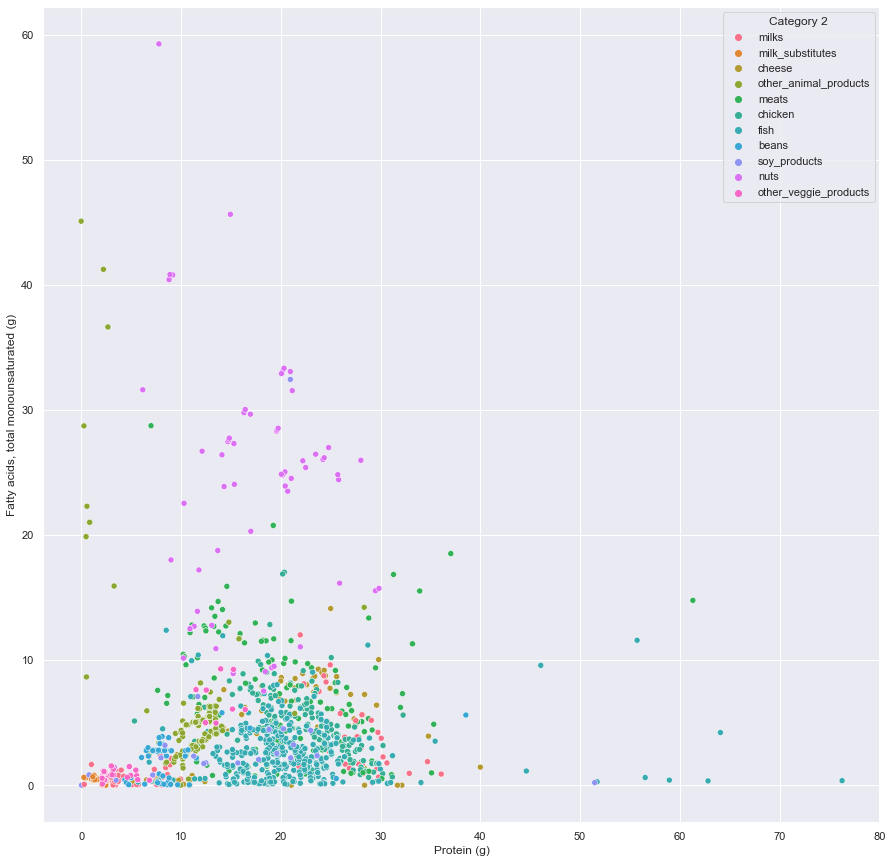

In [170]:
sns.set_theme()

plt.figure(figsize = (15, 15))

sns.scatterplot(data = pos_filtered, x = "Protein (g)", y = 'Fatty acids, total monounsaturated (g)', hue = "Category 2")

In [171]:
pos_filtered[pos_filtered["Category 3"] == "veggie"][["Food name", "Protein (g)", "Cholesterol (mg)"]].sort_values(by = "Protein (g)", ascending = False).head(20)

,Food name,Protein (g),Cholesterol (mg)
2955,"Textured vegetable protein, dry",51.46,0
2937,Soy nuts,38.55,0
3093,"Pumpkin seeds, unsalted",29.84,0
3091,"Pumpkin seeds, NFS",29.84,0
3092,"Pumpkin seeds, salted",29.49,0
3028,"Peanuts, roasted, unsalted",28.03,0
3027,"Peanuts, roasted, salted",28.03,0
3053,"Peanut butter, reduced fat",25.90,0
3026,"Peanuts, unroasted",25.80,0
3054,"Peanut butter, vitamin and mineral fortified",25.72,0


In [172]:
pos_filtered.groupby("Category 2").agg({'Protein (g)' : (np.mean, np.median),
                                        'Fiber, total dietary (g)' : (np.mean, np.median),
                                        'Energy (kcal)' : (np.mean, np.median),
                                        'Total Fat (g)' : (np.mean, np.median),
                                        'Fatty acids, total saturated (g)' : (np.mean, np.median),
                                        'Fatty acids, total monounsaturated (g)' : (np.mean, np.median),
                                        'Fatty acids, total polyunsaturated (g)' : (np.mean, np.median),
                                        'Cholesterol (mg)' : (np.mean, np.median)}).sort_values(by = ("Protein (g)", "mean"), ascending = False).T

Category 2                                        chicken       meats  \
Protein (g)                            mean     23.178750   21.688153   
                                       median   23.590000   21.450000   
Fiber, total dietary (g)               mean      0.159375    0.153153   
                                       median    0.000000    0.000000   
Energy (kcal)                          mean    214.375000  252.873874   
                                       median  203.000000  239.000000   
Total Fat (g)                          mean     11.682946   16.350270   
                                       median   10.695000   14.775000   
Fatty acids, total saturated (g)       mean      2.936897    5.565946   
                                       median    2.707500    4.273500   
Fatty acids, total monounsaturated (g) mean      4.692308    7.085216   
                                       median    4.099000    6.129500   
Fatty acids, total polyunsaturated (g) mean      2.731357    2.325766   
                                       median    2.465000    1.706000   
Cholesterol (mg)                       mean    101.843750  107.540541   
                                       median  103.000000   81.000000   

Category 2                                           fish      cheese  \
Protein (g)                            mean     21.006613   20.260959   
                                       median   20.135000   21.400000   
Fiber, total dietary (g)               mean      0.287558    0.100000   
                                       median    0.000000    0.000000   
Energy (kcal)                          mean    177.133641  275.849315   
                                       median  176.500000  307.000000   
Total Fat (g)                          mean      7.109631   19.127534   
                                       median    6.370000   21.600000   
Fatty acids, total saturated (g)       mean      1.648876   11.244192   
                                       median    1.363000   12.940000   
Fatty acids, total monounsaturated (g) mean      2.552599    5.113616   
                                       median    2.248000    5.655000   
Fatty acids, total polyunsaturated (g) mean      2.014512    0.978959   
                                       median    1.645000    0.724000   
Cholesterol (mg)                       mean     85.361751   61.315068   
                                       median   67.000000   69.000000   

Category 2                                           nuts  soy_products  \
Protein (g)                            mean     17.534103     15.675714   
                                       median   19.215000     15.700000   
Fiber, total dietary (g)               mean      8.097436      3.985714   
                                       median    7.700000      3.300000   
Energy (kcal)                          mean    576.128205    226.000000   
                                       median  587.000000    208.000000   
Total Fat (g)                          mean     49.151282     12.525238   
                                       median   49.800000      9.000000   
Fatty acids, total saturated (g)       mean      7.314026      2.111714   
                                       median    6.774000      1.440000   
Fatty acids, total monounsaturated (g) mean     23.527795      3.832476   
                                       median   25.670500      2.188000   
Fatty acids, total polyunsaturated (g) mean     15.406705      5.083619   
                                       median   13.620000      4.572000   
Cholesterol (mg)                       mean      0.051282      1.571429   
                                       median    0.000000      0.000000   

Category 2                                          milks  \
Protein (g)                            mean     13.657712   
                                       median    7.730000   
Fiber, total dietary (g)               mean      0.096610

In [173]:
pos_filtered[["Food name", "Category name",  "Category 2", "Category 3", "Protein (g)"]].sort_values(by = "Protein (g)", ascending = False).head(30)

,Food name,Category name,Category 2,Category 3,Protein (g)
1528,"Tuna, fresh, dried",Fish,fish,animal,76.25
1468,"Salmon, dried",Fish,fish,animal,64.06
1249,"Fish, NS as to type, dried",Fish,fish,animal,62.82
1306,"Cod, dried, salted",Fish,fish,animal,62.82
826,Pork skin rinds,Pork,meats,animal,61.30
1584,"Squid, dried",Shellfish,fish,animal,58.94
1571,"Octopus, dried",Shellfish,fish,animal,56.52
1373,"Herring, dried, salted",Fish,fish,animal,55.71
1657,"Shrimp, dried",Shellfish,fish,animal,51.70
2955,"Textured vegetable protein, dry",Processed soy products,soy_products,veggie,51.46


In [34]:
#main.head(1).to_csv("template.csv")

# -------------------------------- HEURA --------------------------------
heura_keys = main2.columns
heura_values = [None for x in range(len(main2.columns))]

heura = dict(zip(heura_keys, heura_values))

# heura info : https://www.greencommon.com/original-chunks.html
heura["Energy (kcal)"] = 136.0
heura["Protein (g)"] = 19.7
heura["Total Fat (g)"] = 3.0
heura["Fatty acids, total saturated (g)"] = 0.4
heura["Cholesterol (mg)"] = 0.0
heura["Carbohydrate (g)"] = 1.8
heura["Sugars, total (g)"] = 0.0
heura["Fiber, total dietary (g)"] = 6.4
heura["Sodium (mg)"] = 539.0
heura["Iron (mg)"] = 7.2
heura["Vitamin B-12 (mcg)"] = 3.0
heura["Category 2"] = "soy_products"
heura["Category 3"] = "veggie"

# -------------------------------- SEITAN --------------------------------
seitan_keys = main2.columns
seitan_values = [None for x in range(len(main2.columns))]

seitan = dict(zip(seitan_keys, seitan_values))

# seitan info : https://www.menshealth.com/nutrition/a19527367/seitan-nutrition-facts/
# the values are in ounces, so I multiply them by 3.5274 to have the proportinal nutrional values of 100g
seitan["Energy (kcal)"] = 104.0 * 3.5274
seitan["Protein (g)"] = 21.0 * 3.5274
seitan["Total Fat (g)"] = 1.0 * 3.5274
seitan["Fatty acids, total saturated (g)"] = 0 * 3.5274
seitan["Fatty acids, total monounsaturated (g)"] = 0 * 3.5274
seitan["Fatty acids, total polyunsaturated (g)"] = 0 * 3.5274
seitan["Carbohydrate (g)"] = 4.0 * 3.5274
seitan["Sugars, total (g)"] = 0.0 * 3.5274
seitan["Fiber, total dietary (g)"] = 0.0 * 3.5274
seitan["Category 2"] = "other_veggie_products"
seitan["Category 3"] = "veggie"

In [36]:
pos_filtered = main2[main2["Category name"].isin(full_positive_filter)]

print(main2.shape)
print(pos_filtered.shape)

(7083, 29)
(1508, 29)


In [38]:
sns.set_theme()

sns.scatterplot(data = pos_filtered, x = "Protein (g)", y = 'Fatty acids, total monounsaturated (g)', hue = "Category 2")

ValueError: Could not interpret value `Category 2` for parameter `hue`

In [39]:
pos_filtered

,Food name,Category number,Category name,Protein (g),Water (g),"Fiber, total dietary (g)","Vitamin A, RAE (mcg_RAE)",Thiamin (mg),Riboflavin (mg),Niacin (mg),...,Sodium (mg),Zinc (mg),Energy (kcal),"Sugars, total (g)",Total Fat (g),"Fatty acids, total saturated (g)","Fatty acids, total monounsaturated (g)","Fatty acids, total polyunsaturated (g)",Cholesterol (mg),Vitamin D (D2 + D3) (mcg)
0,"Milk, human",9602,Human milk,1.03,87.50,0.0,61,0.014,0.036,0.177,...,17,0.17,70,6.89,4.38,2.009,1.658,0.497,14,0.1
1,"Milk, NFS",1004,"Milk, reduced fat",3.34,89.04,0.0,59,0.057,0.137,0.110,...,39,0.42,51,4.89,1.99,1.164,0.426,0.065,8,1.1
2,"Milk, whole",1002,"Milk, whole",3.28,88.10,0.0,32,0.056,0.138,0.105,...,38,0.41,60,4.81,3.20,1.860,0.688,0.108,12,1.1
3,"Milk, low sodium, whole",1002,"Milk, whole",3.10,88.20,0.0,29,0.020,0.105,0.043,...,3,0.38,61,4.46,3.46,2.154,0.999,0.128,14,1.3
4,"Milk, calcium fortified, whole",1002,"Milk, whole",3.28,88.10,0.0,32,0.056,0.138,0.105,...,38,0.41,60,4.81,3.20,1.860,0.688,0.108,12,1.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6328,"Butter-oil blend, light",8002,Butter and animal fats,3.30,42.10,0.0,465,0.010,0.070,0.020,...,450,0.26,499,0.00,55.10,34.321,15.927,2.046,106,0.0
6331,Animal fat or drippings,8002,Butter and animal fats,2.23,3.91,0.0,0,0.006,0.010,0.320,...,604,0.34,841,0.00,92.18,35.580,41.249,10.052,93,2.2
6332,Lard,8002,Butter and animal fats,0.00,0.00,0.0,0,0.000,0.000,0.000,...,0,0.11,902,0.00,100.00,39.200,45.100,11.200,95,2.5
6334,"Ghee, clarified butter",8002,Butter and animal fats,0.28,0.24,0.0,840,0.001,0.005,0.003,...,2,0.01,876,0.00,99.48,61.924,28.732,3.694,256,0.0
